In [103]:
import torch
import torch.nn as nn

#model class
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5, 1)
        self.conv2 = nn.Conv2d(10, 20, 5, 1)
        self.dropout = nn.Dropout(0.5)
        self.lin1 = nn.Linear(320,50)
        self.lin2 = nn.Linear(50,10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
#load model with pretrained weights
model = Model()
model.eval()
PATH = 'models/base.pt'
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

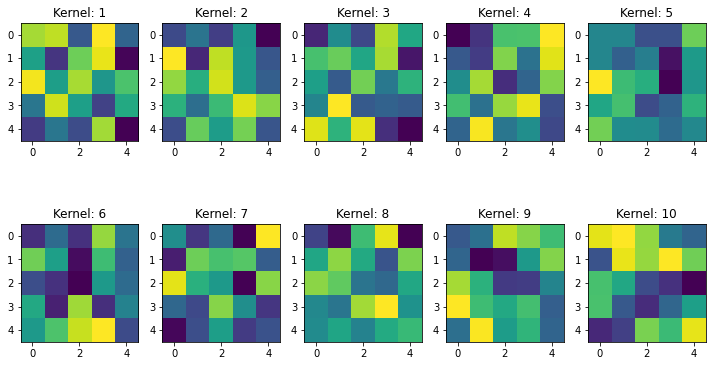

In [104]:
import matplotlib.pyplot as plt

#iterate over kerns of first layer and plot
fig, axes = plt.subplots(2, 5, figsize=(10,6))

for i in range(10):
    axes[i//5, i%5].imshow(model.conv1.weight[i].detach().reshape(5,5))
    axes[i//5, i%5].set_title('Kernel: {}'.format(i+1))
    
plt.tight_layout()
plt.show()

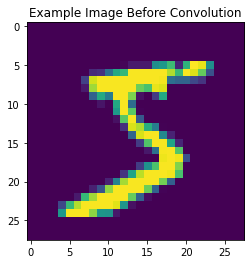

In [106]:
plt.imshow(first_image)
plt.title('Example Image Before Convolution')
plt.show()

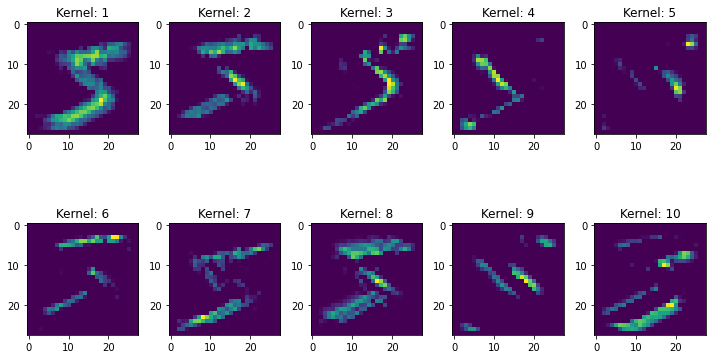

In [107]:
from torchvision import datasets, transforms
import cv2

transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST('../data/train', train=True, download=True, transform=transform)
first_image = mnist_trainset.data[0].reshape(28,28)

fig, axes = plt.subplots(2, 5, figsize=(10,6))

with torch.no_grad():
    for i in range(10):
        axes[i//5, i%5].imshow(cv2.filter2D(first_image.numpy(), -1, model.conv1.weight[i].detach().reshape(5,5).numpy()))
        axes[i//5, i%5].set_title('Kernel: {}'.format(i+1))
    plt.tight_layout()
    plt.show()

In [129]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#model class
class Submodel(nn.Module):
    def __init__(self):
        super(Submodel, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5, 1)
        self.conv2 = nn.Conv2d(10, 20, 5, 1)
        self.dropout = nn.Dropout(0.5)
        self.lin1 = nn.Linear(320,50)
        self.lin2 = nn.Linear(50,10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        return x
    
#load model with pretrained weights
submodel = Submodel()
submodel.eval()
PATH = 'models/base.pt'
submodel.load_state_dict(torch.load(PATH))

<All keys matched successfully>

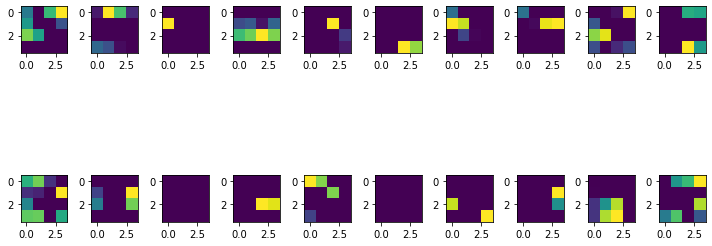

In [139]:
fig, axes = plt.subplots(2, 10, figsize=(10,6))

with torch.no_grad():
    for i in range(20):
        axes[i//10, i%10].imshow(submodel(first_image.reshape(1,1,28,28).float()).detach().numpy().reshape(20,4,4)[i])
    plt.tight_layout()
    plt.show()